<a href="https://colab.research.google.com/github/nailanabq/DSU/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 3 DSU**

*oleh Naila Nabiha Qonita*

Dataset yang digunakan adalah Netflix Movies and TV Shows dari https://www.kaggle.com/datasets/shivamb/netflix-shows

Keterangan variabel-variabel dari dataset tersebut adalah sebagai berikut :
1. **show_id**, nomor ID untuk setiap konten.
2. **type**, tipe kopnten, berisi Movie dan TV Show.
3. **title**, judul konten.
4. **director**, sutradara konten.
5. **cast**, pemeran konten.
6. **country**, asal negara konten.
7. **date_added**, tanggal konten tersebut mulai ditayangkan di Netflix.
8. **release_year**, tahun rilis konten.
9. **rating**, rating konten.
10. **duration**, durasi atau lamanya konten, berisi dalam menit dan season.
11. **listed_in**, genre konten.
12. **description**, deskripsi atau penjelasan tentang konten.

# Import libraries

In [1]:
import warnings;
warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# Load data

Pastikan menyimpan data secara local dengan nama file seperti pada kode

In [ ]:
data = pd.read_csv('netflix_titles.csv')
print(data.shape)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Melihat jumlah NaN pada dataframe
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Menghapus baris yang memiliki NaN pada kolom duration
data.dropna(subset=['duration'], inplace=True)
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Mengganti NaN dengan unknown
data.fillna('Unknown', inplace=True)
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Visualisasi Data

## Pie Chart Movie vs TV Show

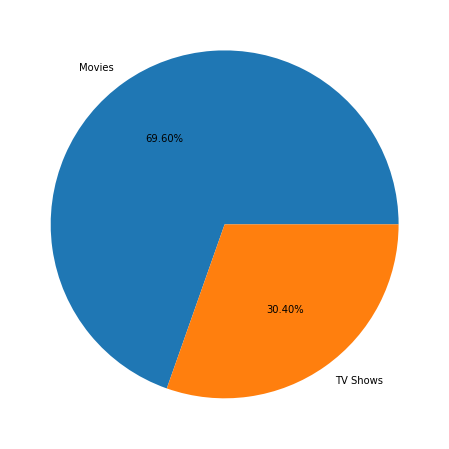

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.type.value_counts(), labels=['Movies','TV Shows'], autopct='%.2f%%')
plt.show()

Dari sini terlihat bahwa terdapat 69.62% konten Movie dan 30.38% konten TV Show.

Sehingga dapat disimpulkan bahwa terdapat lebih banyak konten Movie dibandingkan dengan TV Show di Netflix.

## Scatterplot Rating

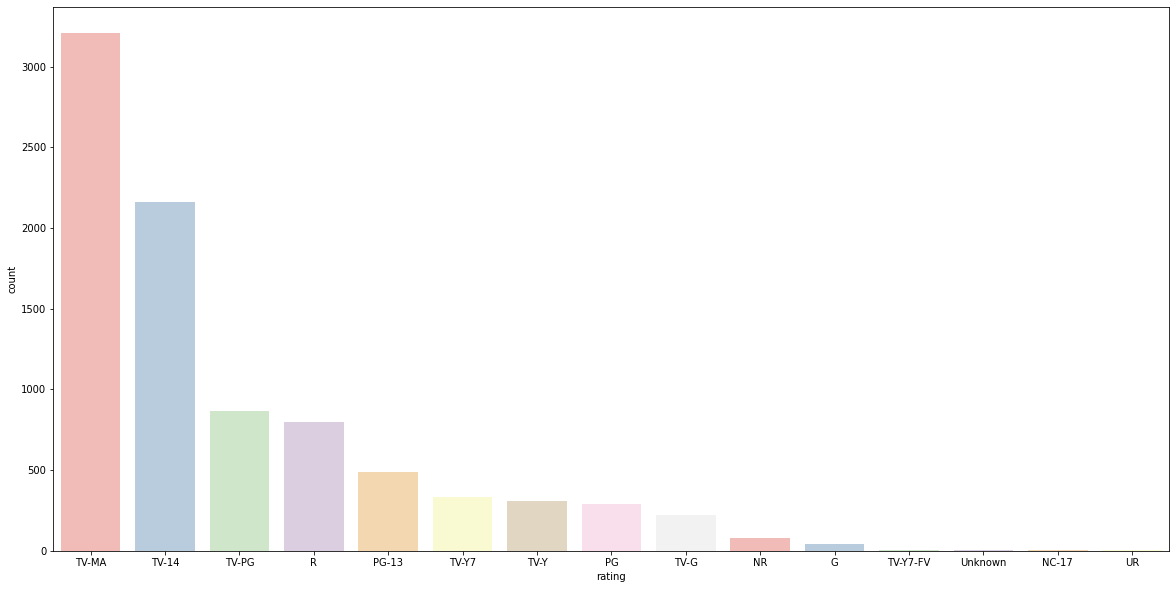

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='rating', data=data, order=data.rating.value_counts().index ,palette='Pastel1')
plt.show()

Dari grafik di atas, terlihat bahwa konten paling banyak dibuat dengan rating TV-MA, yaitu rating yang diberikan oleh US TV Parental Guidelines untuk konten penonton dewasa.

Kemudian disusul dengan TV-14, yaitu konten yang mungkin tidak pantas untuk anak-anak usia di bawah 14 tahun.

Di posisi ketiga terdapat TV-PG, yaitu konten disarankan dengan bimbingan orang tua.

Adapun rating konten lainnya secara berurutan dari yang terbanyak adalah R, PG-13, TV-Y7. TV-Y, PG, TV-G. NR, G, TV-Y7-FV, Tidak diketahui, NC-17. dan UR.

## Barplot Top 10 Country

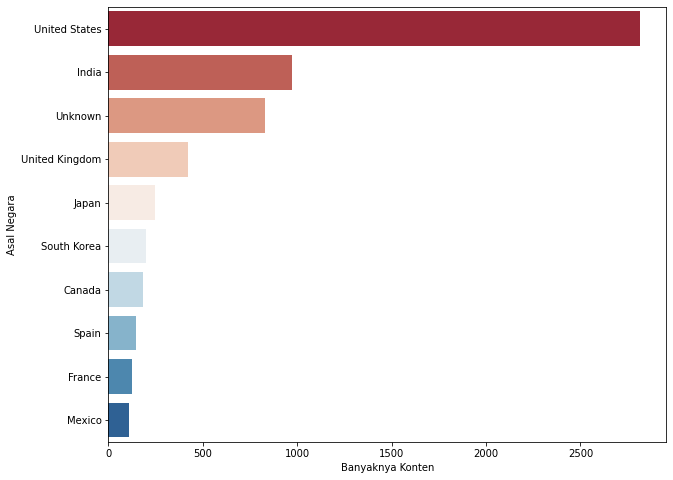

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = data.country, order = data.country.value_counts().iloc[:10].index, palette='RdBu')
plt.xlabel('Banyaknya Konten')
plt.ylabel('Asal Negara')
plt.show()

Dari grafik di atas, terlihat bahwa konten asal Amerika Serikat mendominasi di Netflix dengan jumlah konten yang lebih dari 2.500 konten. Konten asal India menyusul di posisi kedua.

Jika kita abaikan konten dengan asal negara yang tidak diketahui, maka konten asal Inggris adalah konten terbanyak ketiga setelah India. Kemudian disusul oleh Jepang, Korea Selatan, Kanada, Spanyol, Perancis, dan Mexico.

## Lineplot TOP 10 release year

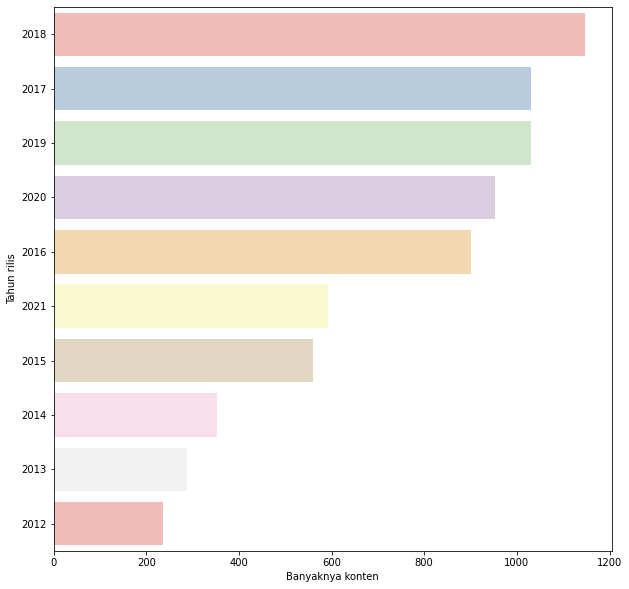

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y = data.release_year, order = data.release_year.value_counts().iloc[:10].index, palette='Pastel1')
plt.xlabel('Banyaknya konten')
plt.ylabel('Tahun rilis')
plt.show()

Dari grafik di atas, terlihat bahwa konten paling banyak dirilis pada tahun 2018. Kemudian kedua terbanyak adalah pada tahun 2017. Lalu ketiga terbanyak adalah pada tahun 2019. Terlihat pada ketiga tahun tersebut, terdapatlebih dari 1.000 konten dirilis pada setiap tahunnya.

Kemudian secara berurutan disusul oleh tahun 2020, 2016, 2021, 2015, 2014, 2013, dan di posisi ke-10 adalah 2012.

## Durasi Movies

In [ ]:
movies = data[data.type == 'Movie']
TVshows = data[data.type == 'TV Show']

In [ ]:
movies.duration = movies.duration.str.replace(' min','')
movies.duration = movies.duration.astype(int)

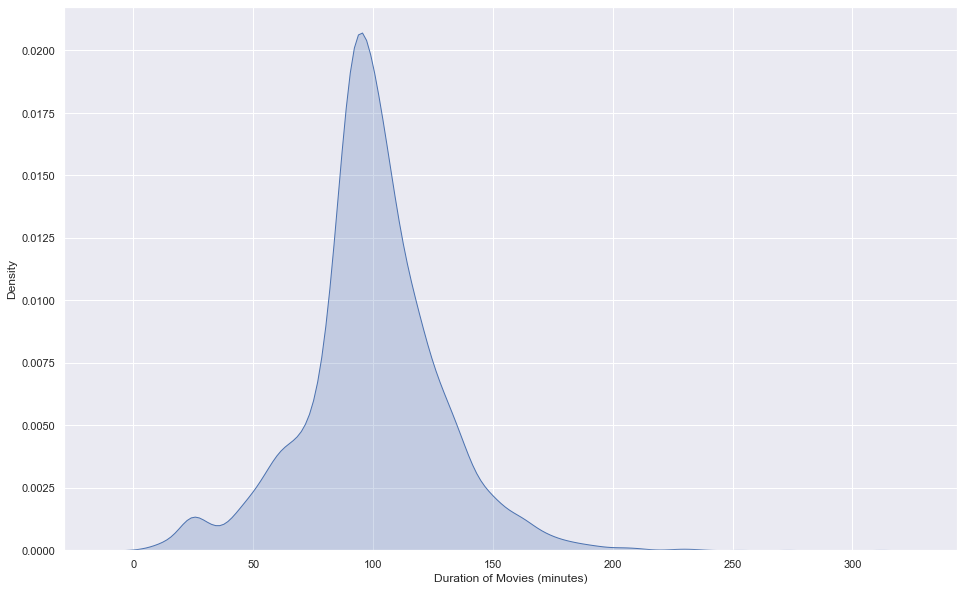

In [ ]:
plt.figure(figsize=(16, 10))
sns.set(style='darkgrid')
sns.kdeplot(data=movies.duration, shade=True)
plt.xlabel('Duration of Movies (minutes)')
plt.show()

In [ ]:
print('Durasi movie terpanjang adalah', max(movies.duration))

Durasi movie terpanjang adalah 312


Dari grafik di atas terlihat bahwa sebagian besar Movie di Netflix memiliki durasi 75-120 menit.

## Banyaknya Season TV Shows

In [ ]:
f = ['title','duration']
durations = TVshows[f]
durations['seasons'] = durations.duration.str.replace(' Season','')
durations['seasons'] = durations['seasons'].str.replace('s','')
durations['seasons'] = durations['seasons'].astype(str).astype(int)

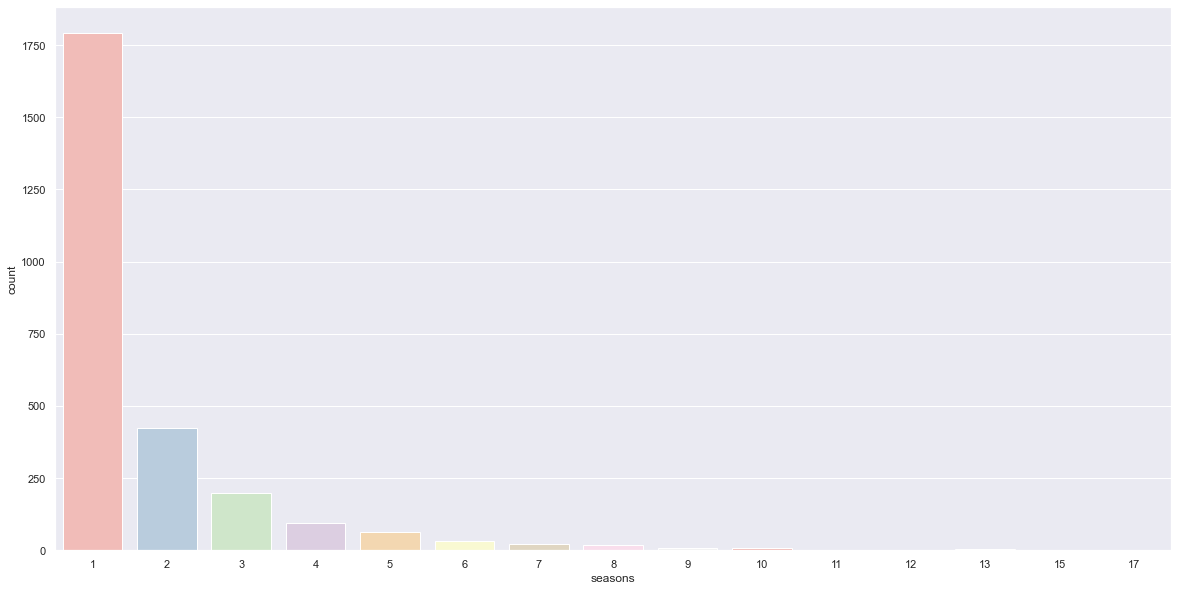

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='seasons', data=durations, palette='Pastel1')
plt.show()

Dari grafik di atas terlihat bahwa TV Show dengan durasi 1 season mendominasi Netflix. Serta dapat kita katakan pula, semakin banyak seasonnya, semakin sedikit jumlah judul kontennya di Netflix.

Terlihat pula terdapat beberapa TV Show dengan jumlah season yang panjang. Season terbanyak dari konten TV Show di Netflix adalah sebesar 17 season.

## Plot Top 10 TV Shows dengan Season terpanjang :D

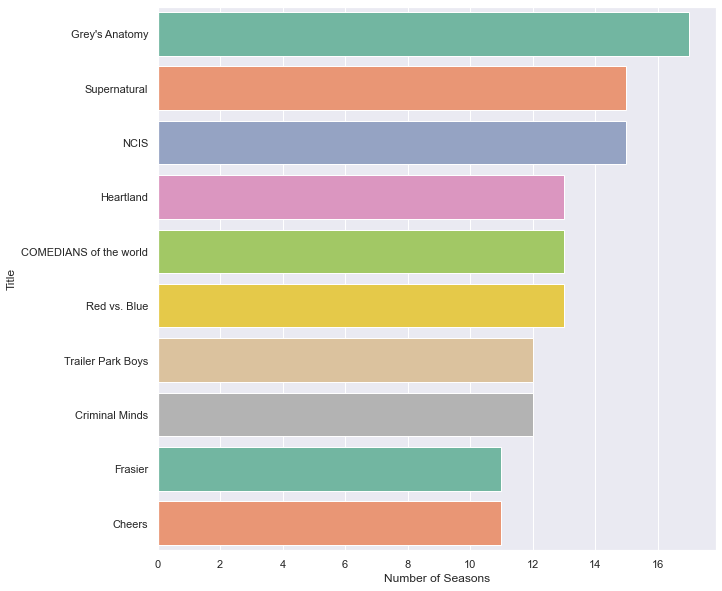

In [ ]:
t = ['title', 'seasons']
top = durations[t]
top = top.sort_values(by='seasons', ascending=False)
top10 = top[0:10]
plt.figure(figsize=(10,10))
sns.barplot(x = top10.seasons, y = top10.title, palette = 'Set2')
plt.xlabel('Number of Seasons')
plt.ylabel('Title')
plt.show()

Dari grafik di atas terlihat bahwa Grey's Anatomy adalah TV Show dengan season terpanjang di Netflix, yaitu dengan total 17 season.

Kemudian di posisi kedua terbanyak, terdapat Supernatural dan NCIS dengan total 15 season.

Di posisi keempat terbanyak, terdapat Heartland, COMEDIANS of the world, dan Red vs. Blue dengan total 13 season.

Di posisi ketujuh terbanyak, terdapat Trailer Park Boys dan Criminal Minds dengan total 12 season.

Dan di poisisi kesembilan terbanyak, terdapat Frassier dan Cheers dengan total 11 season.